In [ ]:
import numpy as np
import pandas as pd
import json
from sklearn.cluster import *
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Read in file
f = open("./embeddings.json", "r")
embeddings = json.load(f)
f.close()

In [3]:
vector_to_file = {}
vectors = []

for f in embeddings:
    vector_to_file[tuple(embeddings[f])] = f
    vectors.append(embeddings[f])

In [6]:
clustering = AgglomerativeClustering().fit(vectors)

In [14]:
linked = linkage(vectors, 'single')
linked

array([[3.77000000e+02, 4.15000000e+02, 1.16564054e-01, 2.00000000e+00],
       [3.91000000e+02, 4.30000000e+02, 1.54579853e-01, 2.00000000e+00],
       [2.04000000e+02, 5.95000000e+02, 1.56851758e-01, 3.00000000e+00],
       ...,
       [1.32000000e+02, 1.18300000e+03, 6.65049684e-01, 5.92000000e+02],
       [3.70000000e+01, 1.18400000e+03, 6.77582373e-01, 5.93000000e+02],
       [1.66000000e+02, 1.18500000e+03, 6.89411530e-01, 5.94000000e+02]])

In [40]:
linked.shape

(593, 4)

In [57]:
rootnode, nodelist = to_tree(linked, rd=True)

/Users/kaanankharwa/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kaanankharwa/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128140 (\N{LOVE LETTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


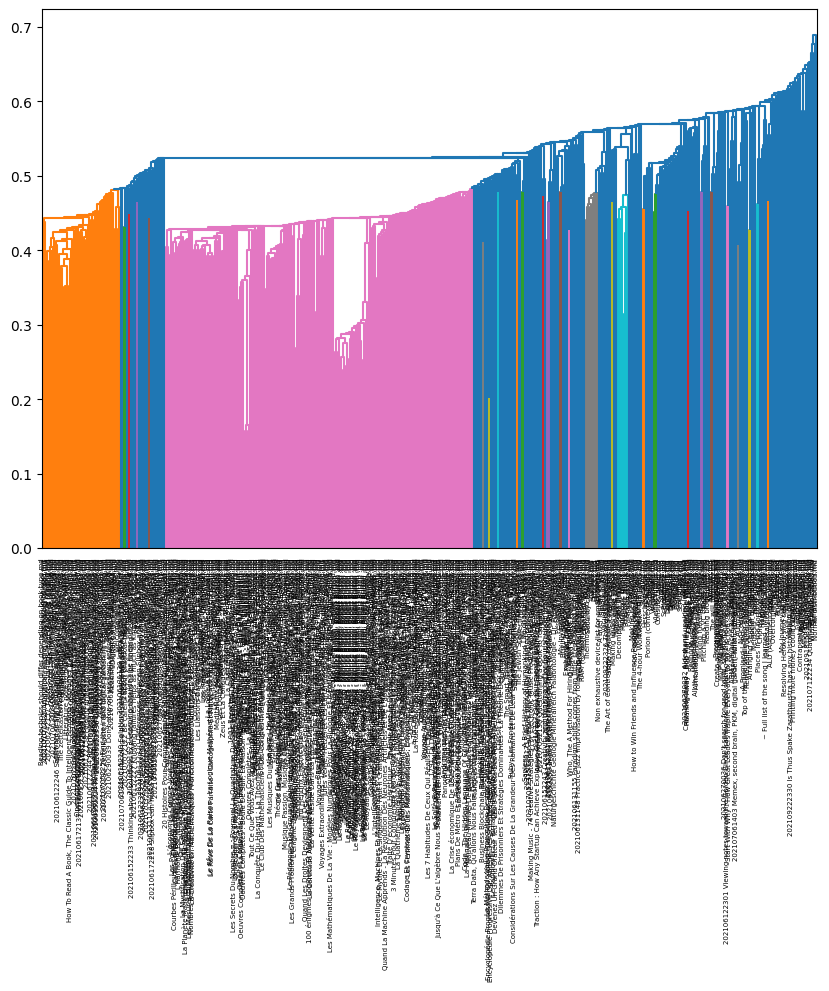

In [41]:
vectors_names = [vector_to_file[tuple(x)]for x in vectors]
plt.figure(figsize=(10, 7))
dgram = dendrogram(linked,
            orientation='top',
            labels=vectors_names,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


In [54]:
class myNode:

   def __init__(self):
        self.files= []
        self.left = None
        self.right = None

In [60]:
def traverse_CF_tree(tree):
    if tree.is_leaf():
        return [vectors_names[tree.get_id()]]
    else:
        new_tree= []
        new_tree.append(traverse_CF_tree(tree.get_left()))
        new_tree.append(traverse_CF_tree(tree.get_right()))
        return new_tree

traverse_CF_tree(rootnode)

[['Normal distribution.md'],
 [['Somatosensory.md'],
  [['Wiring audio cables.md'],
   [['Rebound effect.md'],
    [['202107122234 Quadrivium and Trivium.md'],
     [['Biophilic design.md'],
      [['202109181532 Domestic Cozy.md'],
       [['Graph evolution.md'],
        [["Milgram's experience.md"],
         [[['Mel Spectogram.md'],
           [['AudioSet dataset.md'], ['Sound classification.md']]],
          [['Contrapuntal music (in film).md'],
           [[['Decision fatigue.md'], ['Ego depletion.md']],
            [['Nixie tubes.md'],
             [[['Hyperinflation.md'],
               ['Printing more money could create inflation.md']],
              [['Pygmalion effect.md'],
               [['202109222330 Is Thus Spake Zarathoustra has any historical fundements?.md'],
                [['Writing on Medium.md'],
                 [['Memex.md'],
                  [[['Freemium.md'], ['Newsletters.md']],
                   [['Resolving Heroku slug size problem.md'],
                 

In [103]:
def traverse_CF_tree2(tree):
    if tree.is_leaf():
        new_node= myNode()
        new_node.files.append(vectors_names[tree.get_id()])
        return new_node
    else:
        new_node=myNode()
        if tree.get_left() is not None:
            left = traverse_CF_tree2(tree.get_left())
            new_node.files += left.files
            new_node.left=left
        if tree.get_right() is not None:
            right = traverse_CF_tree2(tree.get_right())
            new_node.files += right.files
            new_node.right = right
        return new_node

In [104]:
my_node = traverse_CF_tree2(rootnode)

In [71]:
df = pd.read_csv("reduced_embeddings_2d.csv")

In [88]:
df

x         y                              filename
0    0.180722 -0.008885      Create a programming language.md
1    0.193767  0.012077              Programming languages.md
2    0.155716  0.200618               Inspectional reading.md
3    0.099533  0.177534                 Reading philosophy.md
4    0.138309  0.208631                  Reading imaginary.md
..        ...       ...                                   ...
589  0.260608  0.029052  Multitasking is counterproductive.md
590  0.239398  0.098796                     Growth mindset.md
591  0.211163 -0.022492                 Social media detox.md
592  0.233814  0.127787                Thinking in writing.md
593  0.186297 -0.033738                      Ego depletion.md

[594 rows x 3 columns]

In [105]:
files = my_node.files
def get_centroid(files, df):
    centroid = df.loc[df['filename'].isin(files)][["x", "y"]].mean()
    centroid_x = centroid["x"]
    centroid_y = centroid["y"]
    return(centroid_x, centroid_y)
get_centroid(files, df)

(-5.980999459260102e-18, -2.990499729630051e-18)

In [112]:
import queue
q = queue.Queue()
q.put(my_node)
q.put("M")
levels = []
centroids = []
while not q.empty():
    val = q.get()
    if val == "M":
        levels.append(centroids)
        centroids = []
        if not q.empty():
            q.put("M")
    else:
        centroids.append(get_centroid(val.files, df))
        if val.left is not None:
            q.put(val.left)
        if val.right is not None:
            q.put(val.right)

In [113]:
levels

[[(-5.980999459260102e-18, -2.990499729630051e-18)],
 [(0.1793654602131346, -0.0565027842132469),
  (-0.0003024712651148972, 9.528294133767914e-05)],
 [(0.1588280753657327, -0.0525294386798023),
  (-0.0005712728641534975, 0.00018417605218419827)],
 [(0.1140164989475404, -0.1043020631500333),
  (-0.0007651608029211723, 0.0003609717191930235)],
 [(0.2134232807245352, -0.0532760443131904),
  (-0.0011281920597473675, 0.0004518819158580793)],
 [(0.0638258496841802, -0.0492797004317243),
  (-0.0012384705686504616, 0.0005363158417453117)],
 [(0.1728378008755802, -0.0778065394090277),
  (-0.001534518649337923, 0.0006695519901309873)],
 [(0.1847253396226301, -0.0855738349610792),
  (-0.0018518267554230605, 0.0008164742847667796)],
 [(0.1422098841811562, -0.0589051346711705),
  (-0.0020976658525844586, 0.0009183882932240118)],
 [(0.1287154461504312, -0.039415050426991),
  (-0.002321278009854569, 0.0009873343423183988)],
 [(0.14247564303282476, -0.0934542400973275),
  (-0.0030676538915178565, 0.0

In [115]:
np.save("clusters", levels)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
